# Imports:

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score,rand_score

# Carregando os dados:

In [3]:
arq_csv = "penguins.csv"

In [4]:
df = pd.read_csv(arq_csv, sep=",") # Fazendo a leitura do arquivo csv

In [5]:
# Exibindo nosso dataset
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
# Exibindo 5 primeiras linhas
df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
# Exibindo 5 ultimas linhas
df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


# Nosso dataset e suas variáveis:

## culmen_length_mm: comprimento do culmen (mm)

## culmen_depth_mm: profundidade do culmen (mm)

## flipper_length_mm: comprimento da nadadeira (mm)

## body_mass_g: massa corporal (g)

## sex: sexo do pinguim


### g: gramas
### mm: milímetrico

# Limpeza e Transformação:

In [8]:
# Limpando espaços em branco nos nomes das colunas (se tiver)
df.columns = [col.strip() for col in df.columns]

In [9]:
# Passando as colunas para português
colunas_ptbr = ["comprimento_culmen_mm","profundidade_culmen_mm", "comprimento_nadadeira_mm",
                "massa_corporal_g","sexo"]
colunas_transformadas = {k:v for k, v in zip(df.columns, colunas_ptbr)}

In [10]:
# Renomeando as colunas
df.rename(columns=colunas_transformadas,inplace=True)
df

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


### Temos 344 linhas e 5 colunas, totalizando 1720 registros

In [11]:
df.shape[0] * df.shape[1]

1720

### Verificando linhas duplicadas:

In [12]:
df[df.duplicated()]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
339,NaN,NaN,NaN,NaN,NaN


### Temos apenas uma linha duplicada, portanto com registros nulos

In [13]:
# Removendo linha duplicada
df.drop_duplicates(inplace=True)

In [14]:
# Verificando após a remoção
df[df.duplicated()]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo


### Verificando registros nulos:

In [15]:
# Registros nulos por coluna
df.isna().sum()

comprimento_culmen_mm       1
profundidade_culmen_mm      1
comprimento_nadadeira_mm    1
massa_corporal_g            1
sexo                        8
dtype: int64

In [16]:
# Registros nulos no total
df.isna().sum().sum()

12

In [17]:
# Visualizando as linhas com registros nulos
df[df.isnull().any(axis=1)]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN


## Certo como objetivo desse projeto é trabalharmos com algoritmo de agrupamento, vamos remover esses registros nulos, porém esse registros nulos seria um bom treinamento se estivéssemos em um projeto com foco em algoritmo de classificação

In [18]:
# Removendo registros nulos
df.dropna(inplace=True) 

In [19]:
# Visualizando após a remoção
df[df.isnull().any(axis=1)]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo


In [20]:
# Visualizando como nosso dataset ficou após a remoção dos registros nulos
df

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


### Agora temos 335 linhas e 5 colunas, totalizando 1675 registros

In [21]:
df.shape[0] * df.shape[1]

1675

# Analise Exploratória:

In [22]:
# Visualizando informações do nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   comprimento_culmen_mm     335 non-null    float64
 1   profundidade_culmen_mm    335 non-null    float64
 2   comprimento_nadadeira_mm  335 non-null    float64
 3   massa_corporal_g          335 non-null    float64
 4   sexo                      335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [23]:
# Verificando a quantidade de tipo de registro em cada variável
for i in df.columns.tolist():
    print(f"{i} : {len(df[i].astype(str).value_counts())}")

comprimento_culmen_mm : 163
profundidade_culmen_mm : 80
comprimento_nadadeira_mm : 56
massa_corporal_g : 93
sexo : 3


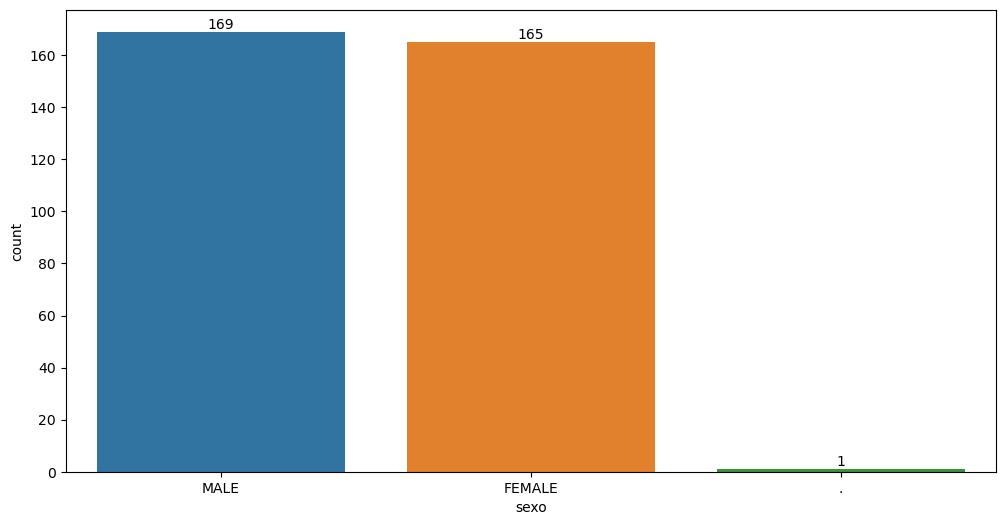

In [24]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df["sexo"])
ax.bar_label(ax.containers[0])
plt.show()

### Temos um registro estranho na variável sexo

In [25]:
df[df["sexo"]=="."]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
336,44.5,15.7,217.0,4875.0,.


In [26]:
# Removendo essa linha
df.drop(336,inplace=True)

In [27]:
df[df["sexo"]=="."]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo


In [28]:
# Executando a verificação novamente
for i in df.columns.tolist():
    print(f"{i} : {len(df[i].astype(str).value_counts())}")

comprimento_culmen_mm : 163
profundidade_culmen_mm : 80
comprimento_nadadeira_mm : 56
massa_corporal_g : 93
sexo : 2


In [29]:
# Verificando possiveis registros negativos em variáveis numéricas
for coluna in df.select_dtypes(np.number).columns:
    print(df.loc[df[coluna] < 0, coluna])

Series([], Name: comprimento_culmen_mm, dtype: float64)
Series([], Name: profundidade_culmen_mm, dtype: float64)
14   -132.0
Name: comprimento_nadadeira_mm, dtype: float64
Series([], Name: massa_corporal_g, dtype: float64)


In [30]:
registro_negativo = df[df["comprimento_nadadeira_mm"] < 0] # Salvando esse registro, pois posteriormente vamos tentar recuperar 
# essa registro negativo

In [31]:
df.drop(14,inplace=True) # Removendo esse registro com valor negativo

In [32]:
# Verificando novamente
for coluna in df.select_dtypes(np.number).columns:
    print(df.loc[df[coluna] < 0, coluna])

Series([], Name: comprimento_culmen_mm, dtype: float64)
Series([], Name: profundidade_culmen_mm, dtype: float64)
Series([], Name: comprimento_nadadeira_mm, dtype: float64)
Series([], Name: massa_corporal_g, dtype: float64)


### Medidas descritivas das variáveis numéricas:

In [33]:
df.select_dtypes(np.number).describe() #Somente colunas numéricas

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.015015,17.162162,215.387387,4206.606607
std,5.445371,1.964430,263.358070,805.149495
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,5000.000000,6300.000000


### Vamos calcular o coeficiente de variação das variáveis:

In [34]:
temp_cv = lambda media, dp: (dp / media) * 100 # Formula para calcular o coeficiente de variação

result_cv = [temp_cv(df[coluna].mean(), df[coluna].std()) for coluna in df.select_dtypes(np.number).columns] # Calculando os 
# coeficiete

In [35]:
colunas_numéricas = df.select_dtypes(np.number).columns # Colunas numéricas
df_cv = pd.DataFrame({"Variáveis":colunas_numéricas, "Coeficiente":result_cv}) # Criando um DataFrame para visualização
df_cv["Coeficiente"] = round(df_cv["Coeficiente"])

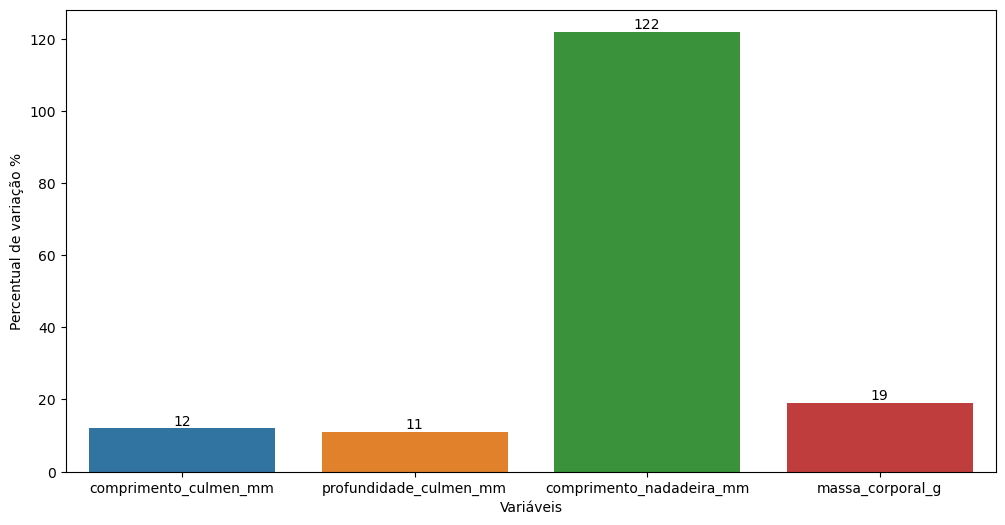

In [36]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df_cv["Variáveis"],y=df_cv["Coeficiente"])
ax.bar_label(ax.containers[0])
plt.ylabel("Percentual de variação %")
plt.show()

### Podemos deduzir que existe valores outliers na variável "comprimento_nadadeira_mm":

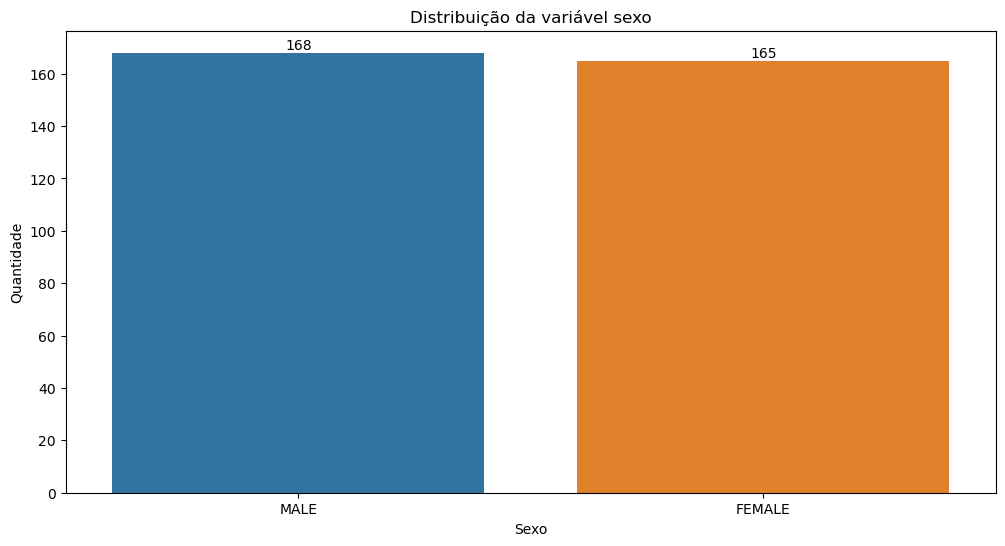

In [37]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df["sexo"])
ax.bar_label(ax.containers[0])
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.title("Distribuição da variável sexo")
plt.show()

### Medidas descritivas por sexo:

In [38]:
# MALE
df[df["sexo"] == "MALE"].describe()

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g
count,168.00000,168.000000,168.000000,168.000000
mean,45.89881,17.885714,233.089286,4544.791667
std,5.30397,1.855346,370.262956,787.880001
min,35.10000,14.100000,178.000000,3250.000000
25%,41.07500,16.075000,193.000000,3900.000000
50%,46.80000,18.450000,201.000000,4300.000000
75%,50.32500,19.250000,219.000000,5312.500000
max,59.60000,21.500000,5000.000000,6300.000000


In [39]:
# FEMALE
df[df["sexo"] == "FEMALE"].describe()

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g
count,165.000000,165.000000,165.000000,165.000000
mean,42.096970,16.425455,197.363636,3862.272727
std,4.903476,1.795681,12.500776,666.172050
min,32.100000,13.100000,172.000000,2700.000000
25%,37.600000,14.500000,187.000000,3350.000000
50%,42.800000,17.000000,193.000000,3650.000000
75%,46.200000,17.800000,210.000000,4550.000000
max,58.000000,20.700000,222.000000,5200.000000


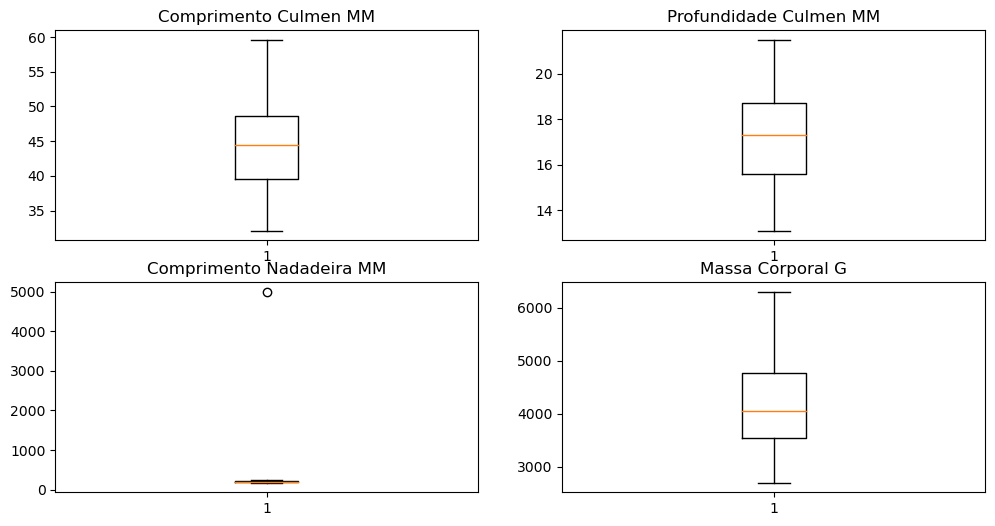

In [40]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
ax[0,0].boxplot(df["comprimento_culmen_mm"])
ax[0,0].set_title("Comprimento Culmen MM")

ax[0,1].boxplot(df["profundidade_culmen_mm"])
ax[0,1].set_title("Profundidade Culmen MM")

ax[1,0].boxplot(df["comprimento_nadadeira_mm"])
ax[1,0].set_title("Comprimento Nadadeira MM")

ax[1,1].boxplot(df["massa_corporal_g"])
ax[1,1].set_title("Massa Corporal G")

plt.show()

### Podemos ver que temos um valor outlier na variável "Comprimento Nadadeira MM", vamos analisar:

In [41]:
IQC = df["comprimento_nadadeira_mm"].quantile(0.75) - df["comprimento_nadadeira_mm"].quantile(0.25) # Intervalo Inter Quartil

In [42]:
formula_outlier_max = df["comprimento_nadadeira_mm"].quantile(0.75) + (1.5 * IQC) # Formula para encontrar valores outliers
# depois do ponto max

In [43]:
outlier = df.loc[formula_outlier_max < df["comprimento_nadadeira_mm"],"comprimento_nadadeira_mm"].index # Localizando o outlier

In [44]:
df.loc[outlier]

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
9,42.0,20.2,5000.0,4250.0,MALE


In [45]:
df.drop(outlier, inplace=True) # Removendo o outlier

### Removemos o outlier pois como vamos trabalhar com o algoritmo Kmeans que é baseado e funciona com as médias das variáves (centroides) e a média é afetado por valores extremos, tomamos a decisão de remover

### Verificando as medidas após a remoção:

In [46]:
df.describe()

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [47]:
cv = (df["comprimento_nadadeira_mm"].std() / df["comprimento_nadadeira_mm"].mean()) * 100
cv # Percentual de variação da variável comprimento nadadeira mm após a remoção do outlier

6.983907382417394

### Boxplots das variáveis numéricas:

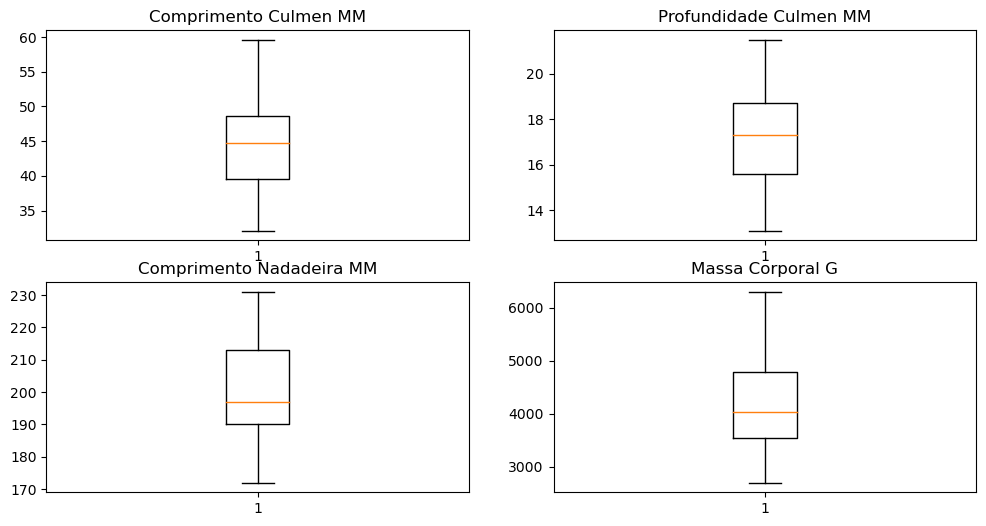

In [48]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
ax[0,0].boxplot(df["comprimento_culmen_mm"])
ax[0,0].set_title("Comprimento Culmen MM")

ax[0,1].boxplot(df["profundidade_culmen_mm"])
ax[0,1].set_title("Profundidade Culmen MM")

ax[1,0].boxplot(df["comprimento_nadadeira_mm"])
ax[1,0].set_title("Comprimento Nadadeira MM")

ax[1,1].boxplot(df["massa_corporal_g"])
ax[1,1].set_title("Massa Corporal G")

plt.show()

### Distribuição das variáveis numéricas:

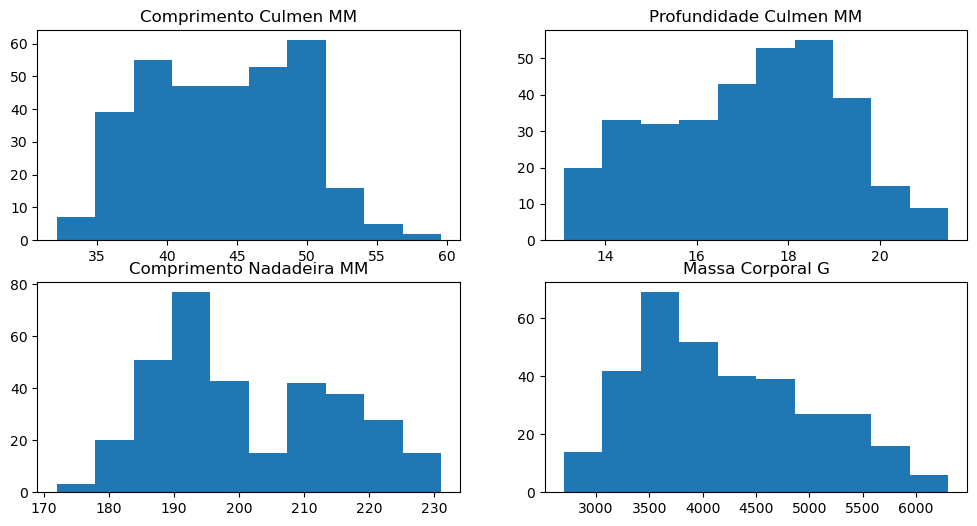

In [49]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
ax[0,0].hist(df["comprimento_culmen_mm"])
ax[0,0].set_title("Comprimento Culmen MM")

ax[0,1].hist(df["profundidade_culmen_mm"])
ax[0,1].set_title("Profundidade Culmen MM")

ax[1,0].hist(df["comprimento_nadadeira_mm"])
ax[1,0].set_title("Comprimento Nadadeira MM")

ax[1,1].hist(df["massa_corporal_g"])
ax[1,1].set_title("Massa Corporal G")

plt.show()

# Modelo KMeans:

### Verificando a distribuição e a dispersão entre duas variáveis:

In [50]:
X = df[colunas_numéricas].copy() # Já separando nossos variável X

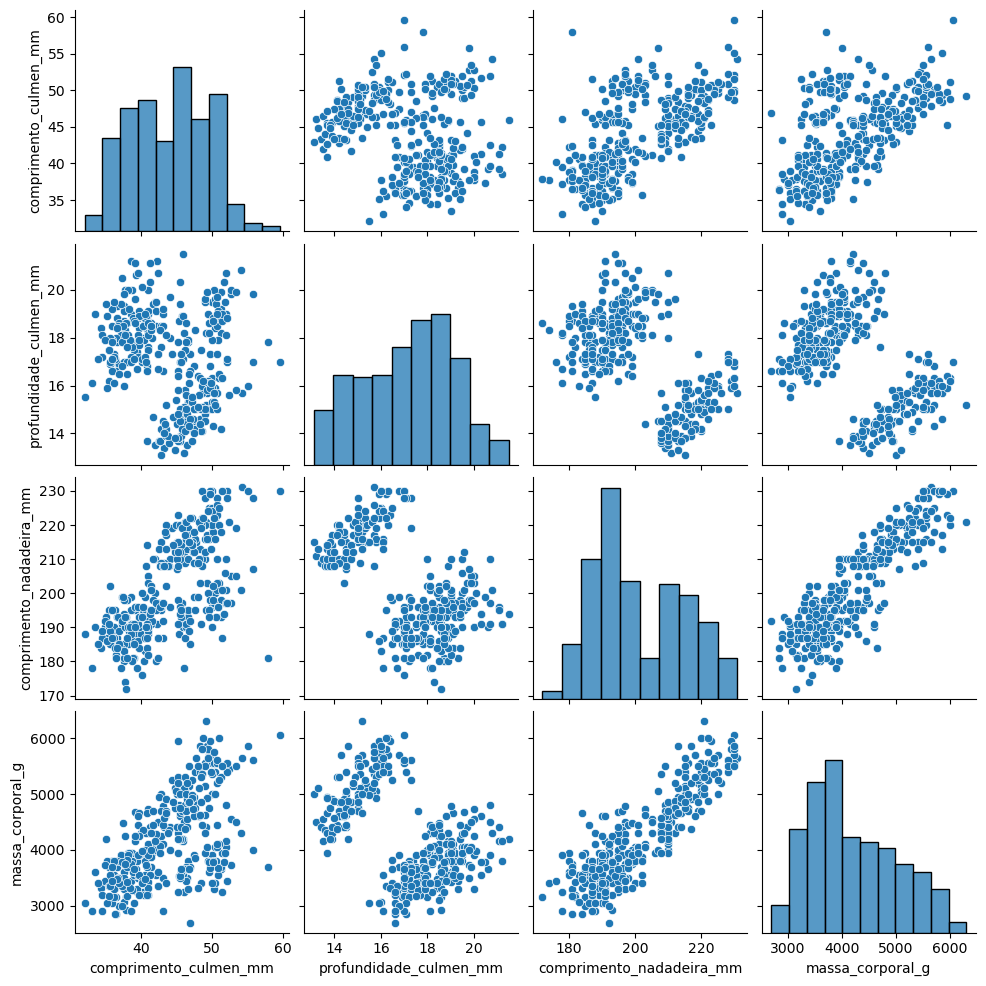

In [51]:
sns.pairplot(X)
plt.show()

### Para o algoritmo Kmeans, vamos treinar com o X padronizado e normalizado e vamos avaliar de qual forma o modelo perfomou melhor:

In [52]:
# Padronização
X_padronizado = StandardScaler().fit_transform(X) # Realizando a transformação
df_padronizado = pd.DataFrame(X_padronizado) # Transformando o array retornado em um DataFrame
df_padronizado.columns = X.columns # Renomeando as colunas
df_padronizado.describe()

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.300442e-16,3.598193e-16,1.008898e-15,2.541474e-17
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00


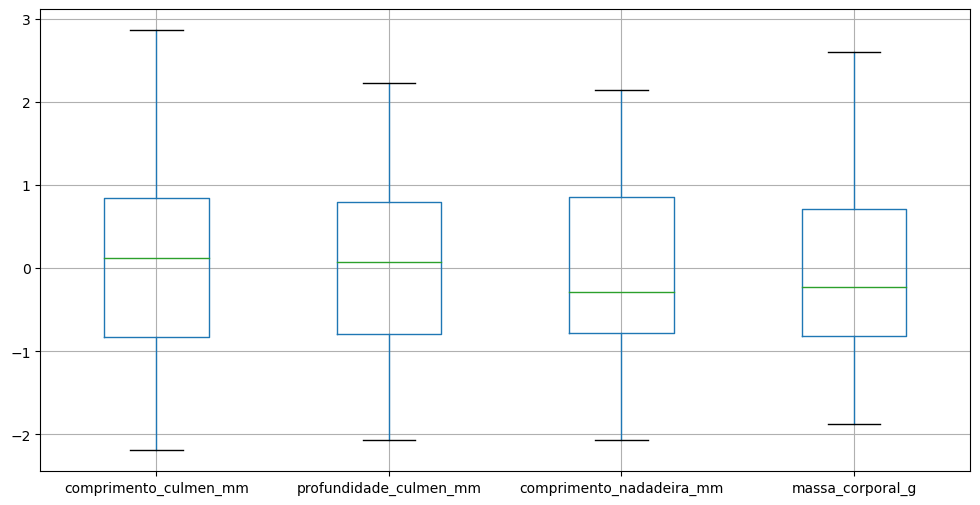

In [53]:
df_padronizado.boxplot(figsize=(12,6))
plt.show()

### Padronização transforma os dados afim de sempre a média ser 0 e o desvio padrão 1

In [54]:
# Normalização
X_normalizado = MinMaxScaler().fit_transform(X) # Realizando a transformação
df_normalizado = pd.DataFrame(X_normalizado) # Transformando o array retornado em um DataFrame
df_normalizado.columns = X.columns # Renomeando as colunas
df_normalizado.describe()

,comprimento_culmen_mm,profundidade_culmen_mm,comprimento_nadadeira_mm,massa_corporal_g
count,332.000000,332.000000,332.000000,332.000000
mean,0.433494,0.482501,0.491117,0.418466
std,0.198271,0.233366,0.237898,0.223989
min,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111
50%,0.458182,0.500000,0.423729,0.368056
75%,0.600909,0.666667,0.694915,0.578125
max,1.000000,1.000000,1.000000,1.000000


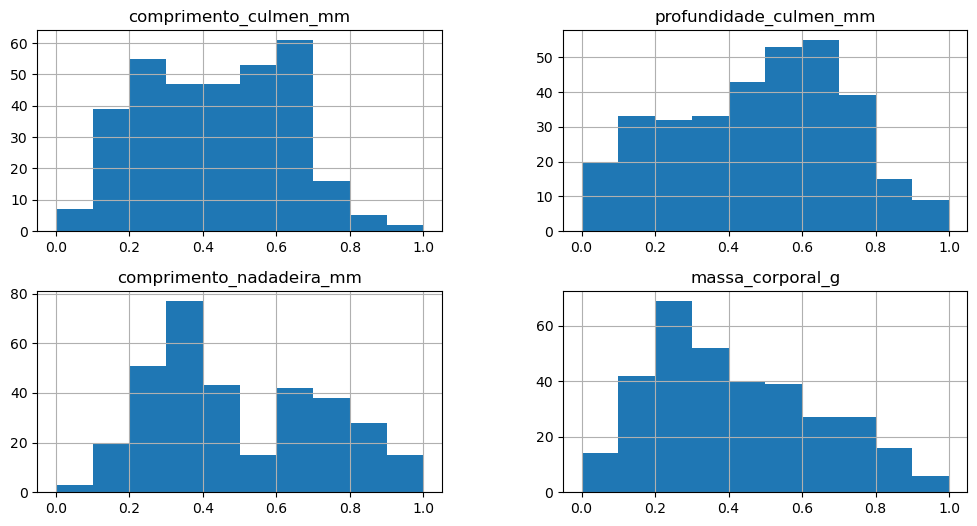

In [55]:
df_normalizado.hist(figsize=(12,6))
plt.show()

### Normalização transforma os dados para deixar numa escala entre 0 e 1

### Vamos encontrar agora o melhor valor de k (grupos) utilizaremos duas técnicas (método do cotovelo e coeficiente de silhueta):

In [56]:
# Método do cotovelo
# Com X padronizado

valores_k = []
inercia = []

for i in range(1,15,1):
    modelo_kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    modelo_kmeans.fit(X_padronizado)
    valores_k.append(i)
    inercia.append(modelo_kmeans.inertia_)

C:\Users\hugog\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


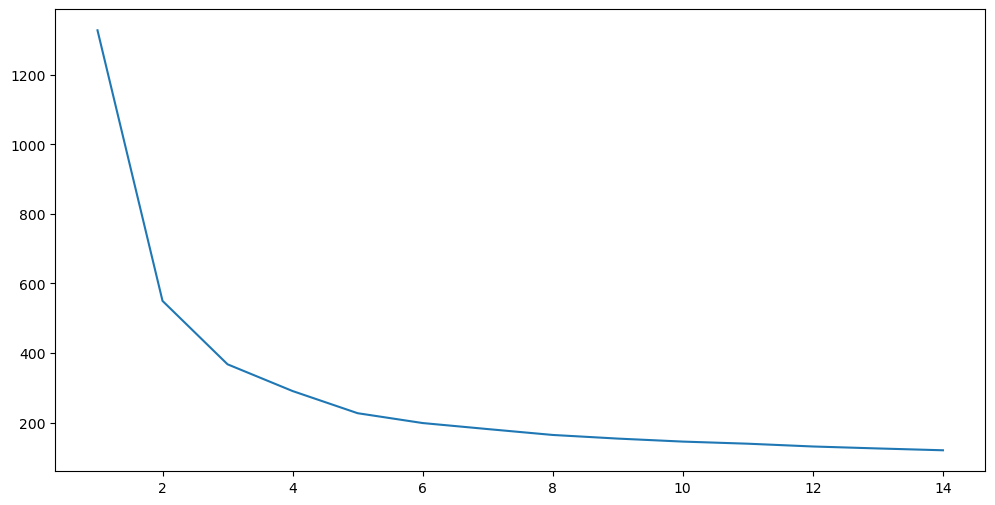

In [57]:
plt.figure(figsize=(12,6))
plt.plot(valores_k, inercia)
plt.show()

In [58]:
# Método do cotovelo
# Com X normalizado

valores_k = []
inercia = []

for i in range(1,15,1):
    modelo_kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    modelo_kmeans.fit(X_normalizado)
    valores_k.append(i)
    inercia.append(modelo_kmeans.inertia_)

C:\Users\hugog\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


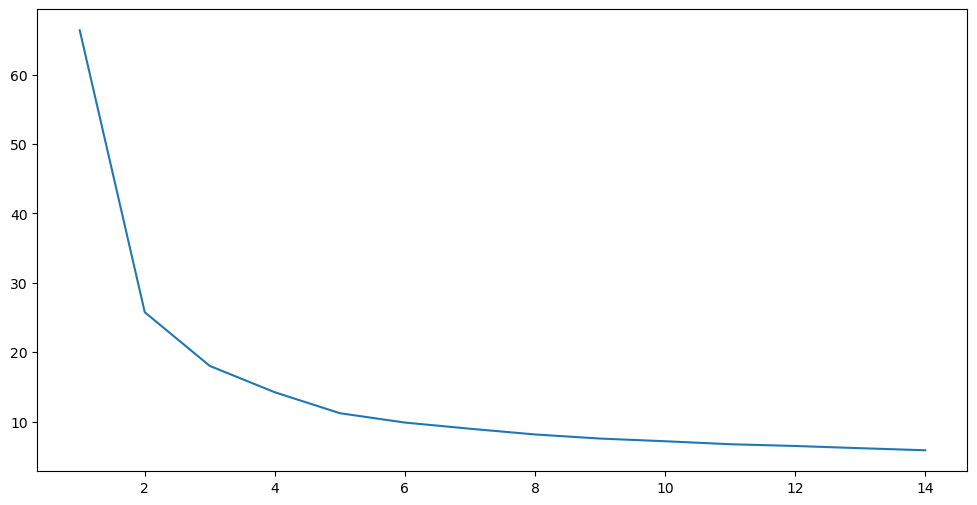

In [59]:
plt.figure(figsize=(12,6))
plt.plot(valores_k, inercia)
plt.show()

### Analisando pelo método do cotovelo eu diria que podemos escolher um k de (2 e 3), vamos tomar essa decisão melhor a partir do método coeficiente de silhueta:
### O calculo do coeficiente de silhueta não pode começar com um k (grupo) de 1, pois como ele calcula a distancia inter grupo, necessita ter mais de 1 k (grupo):

In [60]:
# Coeficiente de silhueta
# Com X padronizado

valores_k = []
coeficiente_silhueta = []

for i in range(2,15,1):
    modelo_kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    modelo_kmeans.fit(X_padronizado)
    valores_k.append(i)
    predict = modelo_kmeans.predict(X_padronizado)
    coeficiente_silhueta.append(silhouette_score(X_padronizado, predict))

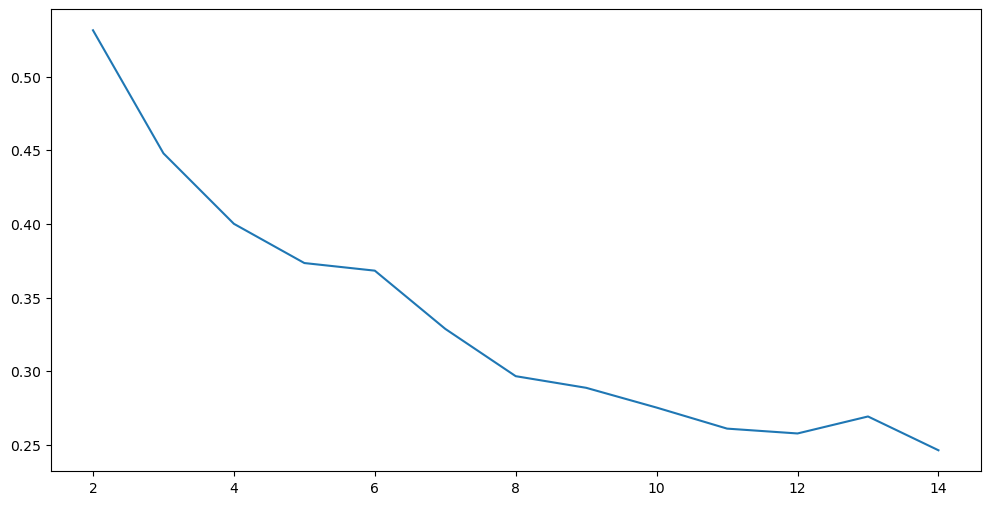

In [61]:
plt.figure(figsize=(12,6))
plt.plot(valores_k, coeficiente_silhueta)
plt.show()

In [62]:
# Coeficiente de silhueta
# Com X normalizado

valores_k = []
coeficiente_silhueta = []

for i in range(2,15,1):
    modelo_kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    modelo_kmeans.fit(X_normalizado)
    valores_k.append(i)
    predict = modelo_kmeans.predict(X_normalizado)
    coeficiente_silhueta.append(silhouette_score(X_normalizado, predict))

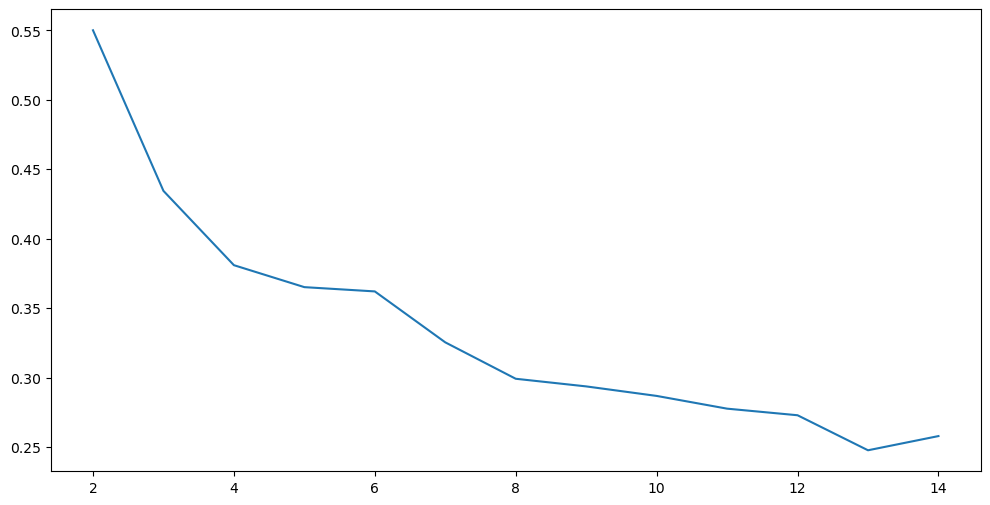

In [63]:
plt.figure(figsize=(12,6))
plt.plot(valores_k, coeficiente_silhueta)
plt.show()

### Certo vamos construir dois modelos um com 2 k (grupos) e outro com 3 k (grupos):

In [64]:
# Modelo com 2 k (grupos) dados padronizados

kmeans2_padronizado = KMeans(n_clusters=2,init="k-means++",random_state=0) # Criando o modelo
kmeans2_padronizado.fit(X_padronizado) # Treinando o modelo
df_padronizado["labels_2_k"] = kmeans2_padronizado.labels_

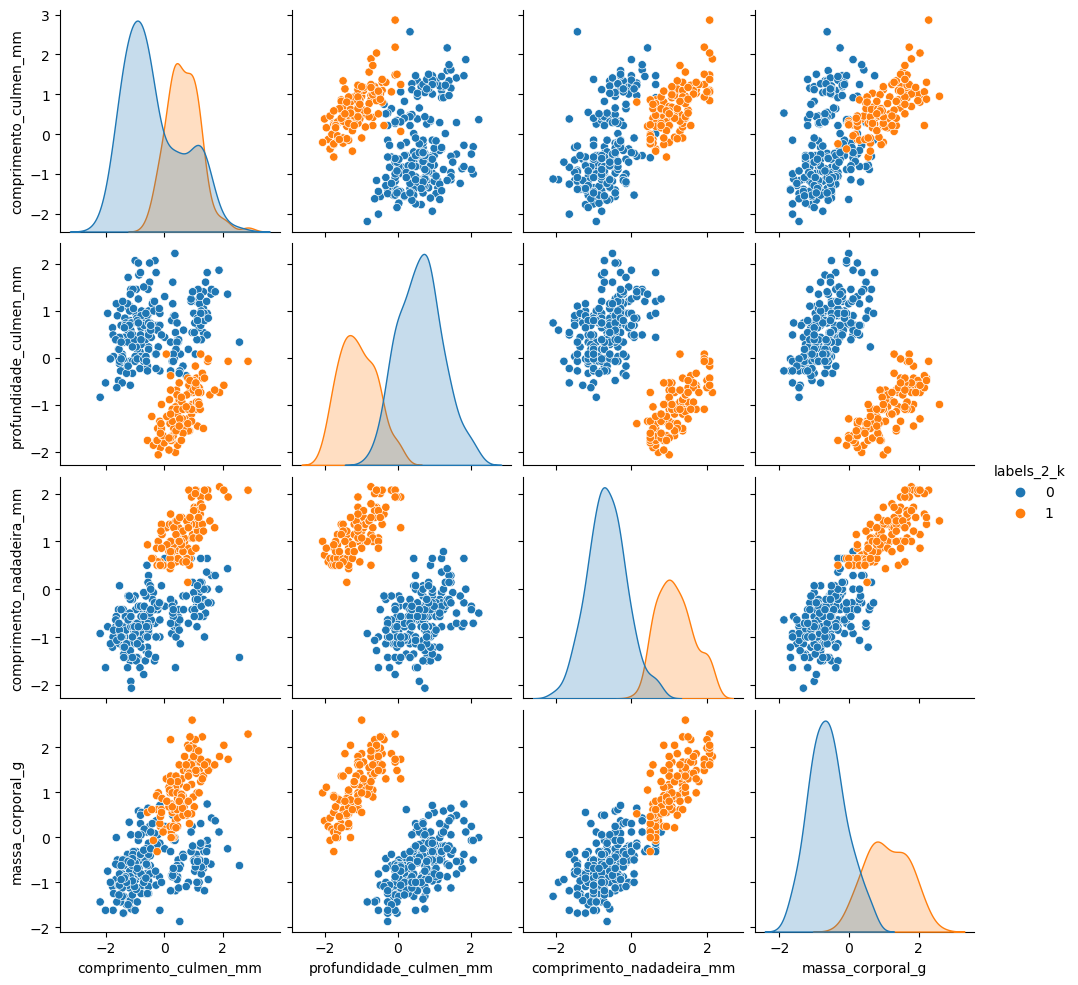

In [65]:
sns.pairplot(df_padronizado, hue="labels_2_k")
plt.show()

In [66]:
# Coeficiente de silhueta do modelo com 2 grupos e dados padronizados
silhouette_score(X_padronizado, kmeans2_padronizado.predict(X_padronizado))

0.5313685849858238

In [67]:
# Modelo com 3 k (grupos) dados padronizados

kmeans3_padronizado = KMeans(n_clusters=3,init="k-means++",random_state=0) # Criando o modelo
kmeans3_padronizado.fit(X_padronizado) # Treinando o modelo
df_padronizado["labels_3_k"] = kmeans3_padronizado.labels_

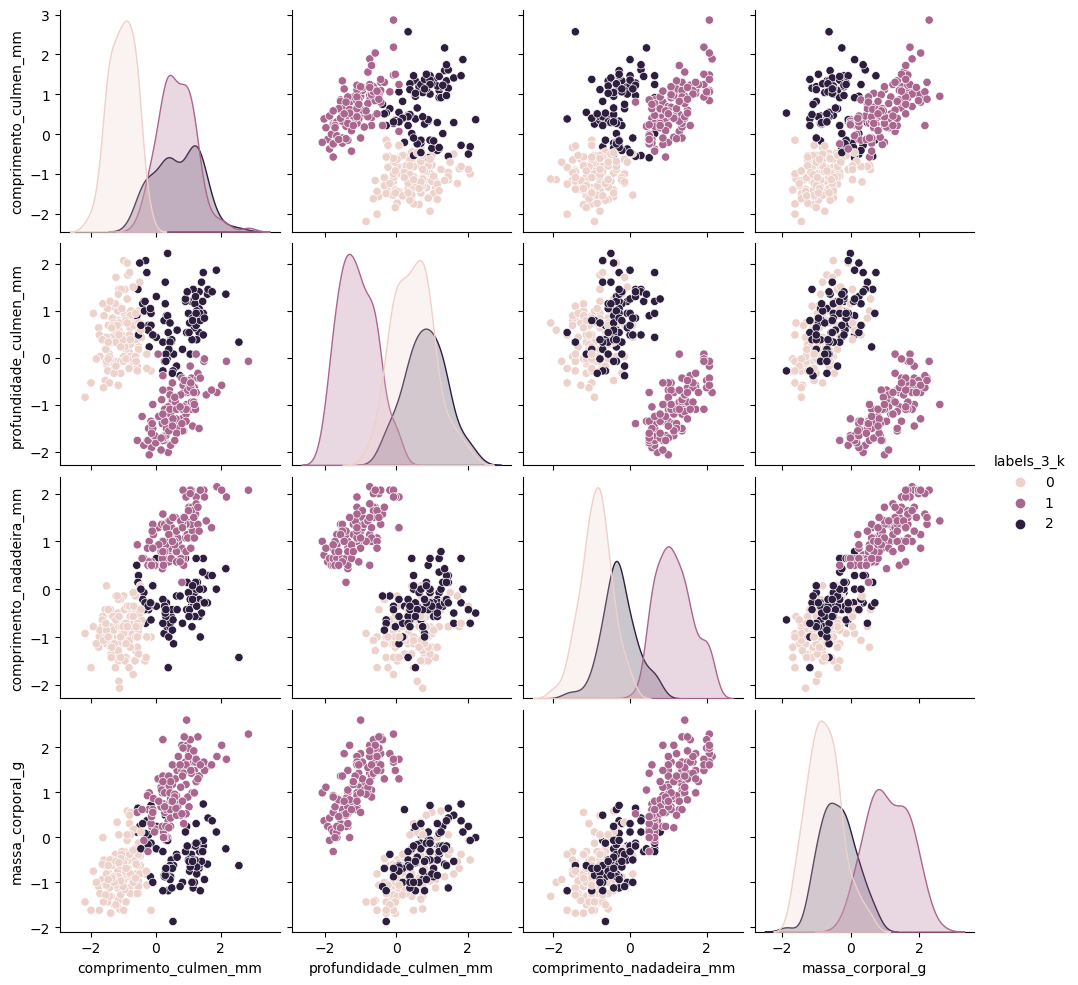

In [68]:
sns.pairplot(df_padronizado.drop(columns = "labels_2_k"), hue="labels_3_k")
plt.show()

In [69]:
# Coeficiente de silhueta do modelo com 3 grupos e dados padronizados
silhouette_score(X_padronizado, kmeans3_padronizado.predict(X_padronizado))

0.447862335700844

### Lembrando que o coeficiente de silhueta calcula a distancia dos pontos intragrupo e intergrupo, ou seja ele mede a distância de um ponto para todos os pontos dentro do seu cluster e a distancia de um ponto para outros pontos de outros cluster, ou seja o que buscamos é a alta similaridade intragrupo e baixa similaridade intergrupo

### O coeficiente varia de -1 a 1 onde:
### 1 = o ponto de dado está muito bem encaixado em seu cluster
### 0 = o ponto de dado está na "fronteira", exatamente sobre ou muito perto da linha que separa dois clusters
### -1 =  o ponto de dado provavelmente foi atribuído ao cluster errado

In [70]:
# Modelo com 2 k (grupos) dados normalizados

kmeans2_normalizado = KMeans(n_clusters=2,init="k-means++",random_state=0) # Criando o modelo
kmeans2_normalizado.fit(X_normalizado) # Treinando o modelo
df_normalizado["labels_2_k"] = kmeans2_normalizado.labels_

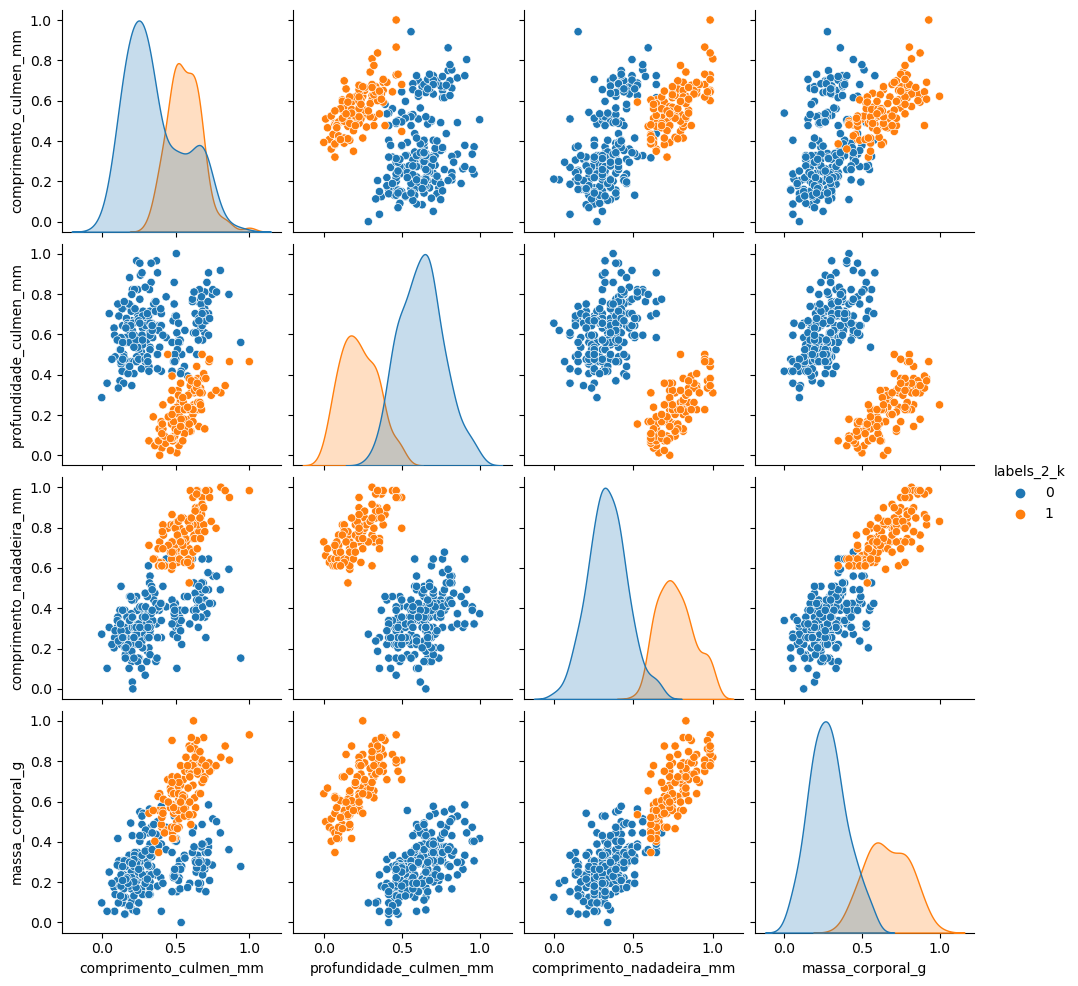

In [71]:
sns.pairplot(df_normalizado, hue="labels_2_k")
plt.show()

In [72]:
# Coeficiente de silhueta do modelo com 2 grupos e dados normalizados
silhouette_score(X_normalizado, kmeans2_normalizado.predict(X_normalizado))

0.5500203089197759

In [73]:
# Modelo com 3 k (grupos) dados normalizados

kmeans3_normalizado = KMeans(n_clusters=3,init="k-means++",random_state=0) # Criando o modelo
kmeans3_normalizado.fit(X_normalizado) # Treinando o modelo
df_normalizado["labels_3_k"] = kmeans3_normalizado.labels_

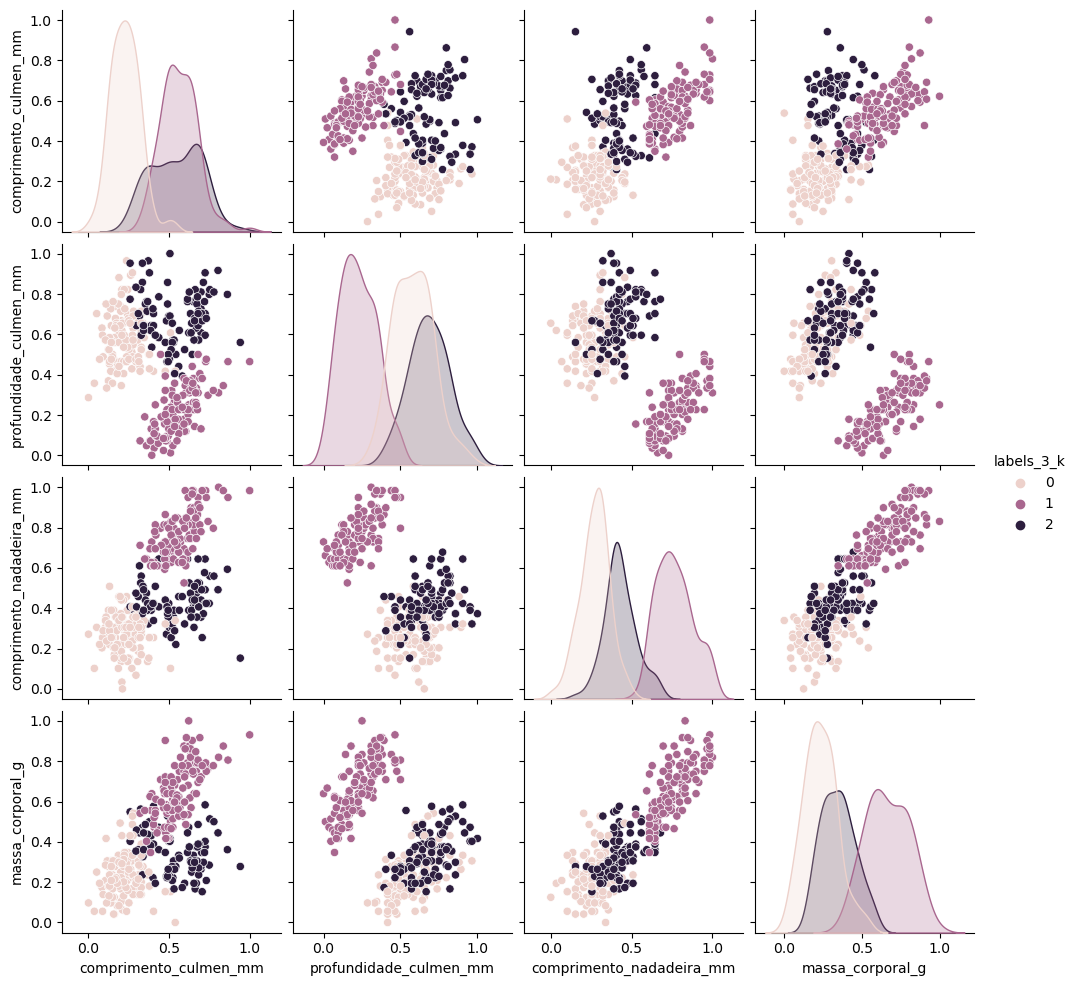

In [74]:
sns.pairplot(df_normalizado.drop(columns = "labels_2_k"), hue="labels_3_k")
plt.show()

In [75]:
# Coeficiente de silhueta do modelo com 3 grupos e dados normalizados
silhouette_score(X_normalizado, kmeans3_normalizado.predict(X_normalizado))

0.43444748919722653